In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from terminal_optimization import hydrogen_objects
from terminal_optimization import hydrogen_defaults
from terminal_optimization import hydrogen_system

# 0. Prepare inputs

In [2]:
startyear = 2018
lifecycle = 10

## 0.1 Generate demand forecast scenario

In [3]:
years = list(range(startyear, startyear+lifecycle))

demand = []
for year in years:
    if year < 2023:
        demand.append(1_000_000)
    else:
        demand.append(3_000_000)

scenario_data={'year': years, 'volume': demand}

# instantiate a commodity objects
# hydrogen
# hydrogen_defaults.lhydrogen_data['smallhydrogen_perc'] = 50
# hydrogen_defaults.lhydrogen_data['largehydrogen_perc'] = 50
# hydrogen_defaults.lhydrogen_data['smallammonia_perc'] = 0
# hydrogen_defaults.lhydrogen_data['largeammonia_perc'] = 0
# hydrogen_defaults.lhydrogen_data['handysize_perc'] = 0
# hydrogen_defaults.lhydrogen_data['panamax_perc'] = 0
# hydrogen_defaults.lhydrogen_data['vlcc_perc'] = 0
# hydrogen_defaults.lhydrogen_data['handling_fee'] = 9.8 # example Wijnand
# hydrogen_defaults.lhydrogen_data['historic_data'] = []
lhydrogen = hydrogen_objects.Commodity(**hydrogen_defaults.lhydrogen_data)
lhydrogen.scenario_data = pd.DataFrame(data=scenario_data)

# wheat
hydrogen_defaults.ammonia_data['historic_data'] = []
hydrogen_defaults.ammonia_data['scenario_data'] = []
ammonia = hydrogen_objects.Commodity(**hydrogen_defaults.ammonia_data)

# soybeans
hydrogen_defaults.MCH_data['historic_data'] = []
hydrogen_defaults.MCH_data['scenario_data'] = []
MCH = hydrogen_objects.Commodity(**hydrogen_defaults.MCH_data)

# combine
demand = [lhydrogen, ammonia, MCH]

# plot scenarios 
if False:
    lhydrogen.plot_demand()
    ammonia.plot_demand()
    MCH.plot_demand()

## 0.2 Generate vessels

In [4]:
# instantiate vessels
Smallhydrogen = hydrogen_objects.Vessel(**hydrogen_defaults.smallhydrogen_data)
Largehydrogen = hydrogen_objects.Vessel(**hydrogen_defaults.largehydrogen_data)
Smallammonia = hydrogen_objects.Vessel(**hydrogen_defaults.smallammonia_data)
Largeammonia = hydrogen_objects.Vessel(**hydrogen_defaults.largeammonia_data)
Handysize = hydrogen_objects.Vessel(**hydrogen_defaults.handysize_data)
Panamax = hydrogen_objects.Vessel(**hydrogen_defaults.panamax_data)
VLCC = hydrogen_objects.Vessel(**hydrogen_defaults.vlcc_data)


vessels = [Smallhydrogen, Largehydrogen, Smallammonia, Largeammonia, Handysize, Panamax, VLCC] 

# 1. Instatiate terminal system

In [5]:
Terminal = hydrogen_system.System(startyear = startyear, 
                         lifecycle = lifecycle, 
                         elements = demand + vessels, 
                         operational_hours = 5840,   # example Wijnand
                         debug=True,
                         storage_type_defaults=hydrogen_defaults.storage_lh2_data)

# 2. Start simulation
Develop terminal given the throughput scenario and investment triggers implemented

In [6]:
Terminal.simulate()


Simulate year: 2018
  Total vessel calls: 54
     Small Hydrogen  calls: 30
     Large Hydrogen calls: 24
     Small ammonia calls: 0
     Large ammonia calls: 0
     Handysize calls: 0
     Panamax calls: 0
     VLCC calls: 0
  Total cargo volume: 1000000
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned

  Start analysis:
     Berth occupancy planned (@ start of year): inf
     Berth occupancy online (@ start of year): inf
     Unloading occupancy planned (@ start of year): inf
     Unloading occupancy online (@ start of year): inf
     waiting time factor (@ start of year): inf
     waiting time occupancy (@ start of year): inf
  *** add Berth to elements
     Berth occupancy planned (after adding berth): inf
     Berth occupancy online (after addi

  *** add Hinter Pipeline to elements
  *** add Hinter Pipeline to elements
     a total of 800 ton of pipeline hinterland service capacity is online; 2400 ton total planned
     Station occupancy planned (@ start of year): 0.30964353835864145
     Station occupancy online (@ start of year): 0.30964353835864145
     Number of trains (@start of year): 833.3333333333333

Simulate year: 2025
  Total vessel calls: 160
     Small Hydrogen  calls: 90
     Large Hydrogen calls: 70
     Small ammonia calls: 0
     Large ammonia calls: 0
     Handysize calls: 0
     Panamax calls: 0
     VLCC calls: 0
  Total cargo volume: 3000000
     a total of 1 Berth_01 is online; 1 total planned
     a total of 1 Jetty_01 is online; 1 total planned
     a total of 5 jetty_pipeline_01 is online; 5 total planned
     a total of 4 HTank_01 is online; 4 total planned
     a total of 6 hinterland_pipeline_01 is online; 6 total planned
     a total of 3 Hinterland_station_01 is online; 3 total planned

  Start a

## Report all elements

In [7]:
if False: 
    for element in Terminal.elements:
        print("")
        print(element.name)
        print("")
        print(element.__dict__)

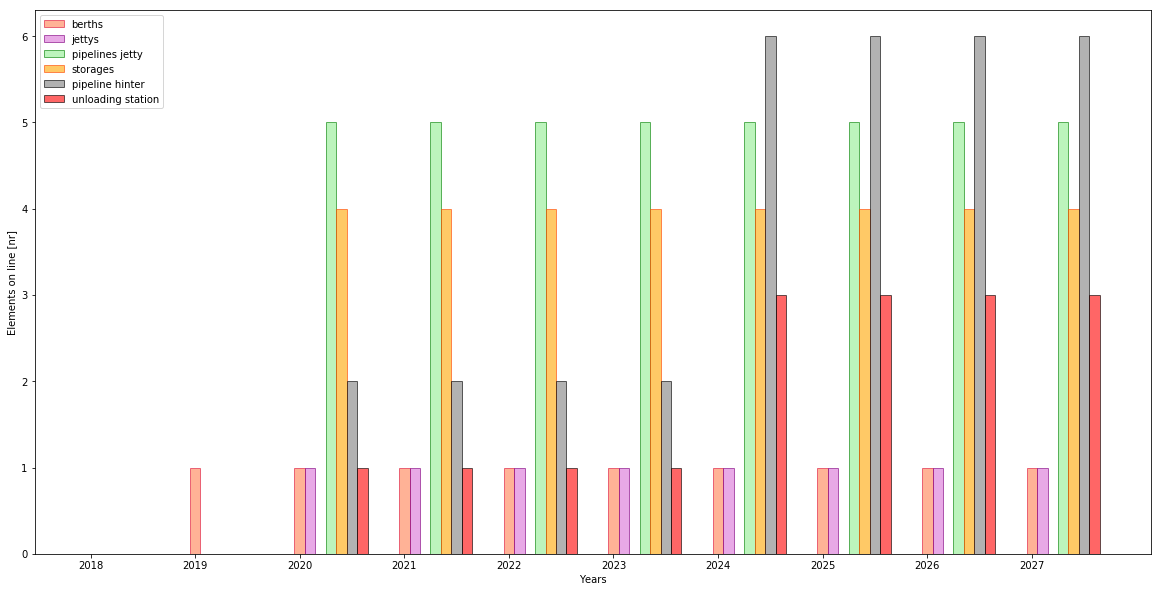

In [8]:
Terminal.terminal_elements_plot()

In [9]:
Terminal.add_cashflow_elements()

(   year         capex   maintenance     insurance        energy        labour  \
 0  2018  1.575600e+07  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
 1  2019  1.920000e+14  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
 2  2020  0.000000e+00  1.920003e+12  1.920001e+12  1.418440e+07  1.586700e+06   
 3  2021  0.000000e+00  1.920003e+12  1.920001e+12  1.418440e+07  1.586700e+06   
 4  2022  0.000000e+00  1.920003e+12  1.920001e+12  1.418440e+07  1.586700e+06   
 5  2023  5.960000e+06  1.920003e+12  1.920001e+12  1.451365e+07  1.586700e+06   
 6  2024  0.000000e+00  1.920003e+12  1.920001e+12  1.451365e+07  2.188669e+06   
 7  2025  0.000000e+00  1.920003e+12  1.920001e+12  1.451365e+07  2.188669e+06   
 8  2026  0.000000e+00  1.920003e+12  1.920001e+12  1.451365e+07  2.188669e+06   
 9  2027  0.000000e+00  1.920003e+12  1.920001e+12  1.451365e+07  2.188669e+06   
 
    demurrage    revenues  
 0          0         0.0  
 1          0         0.0  
 2          

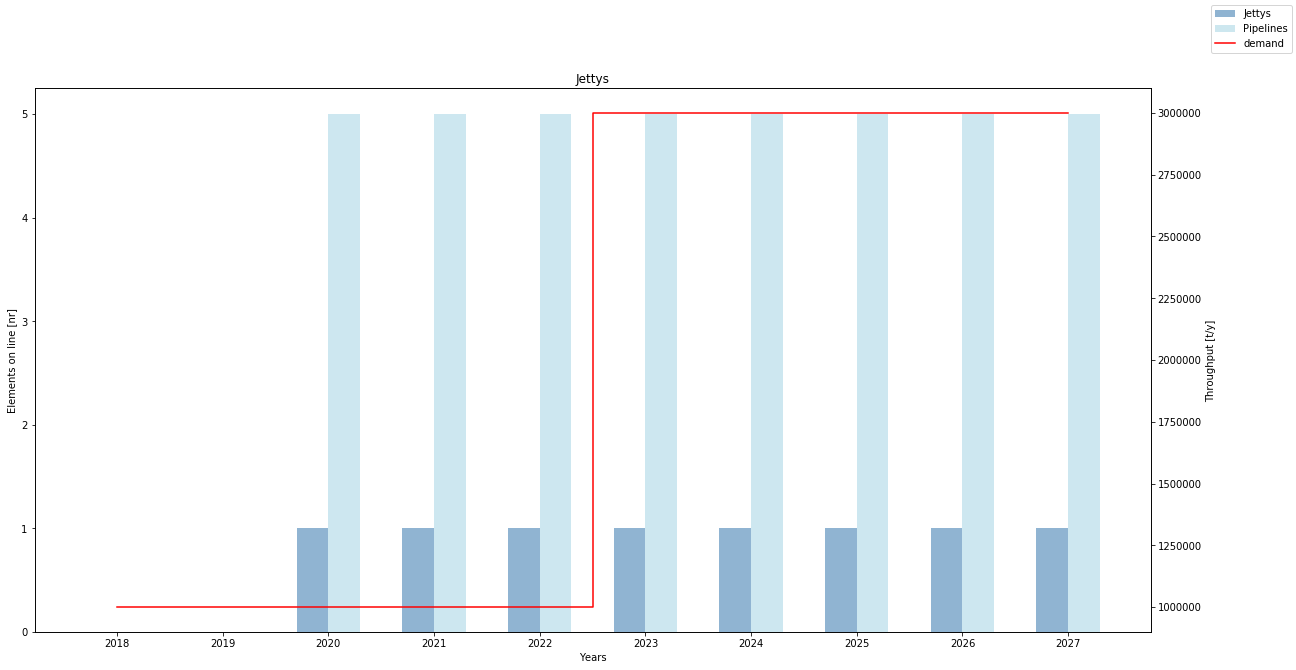

In [10]:
Terminal.terminal_elements_example_plot()

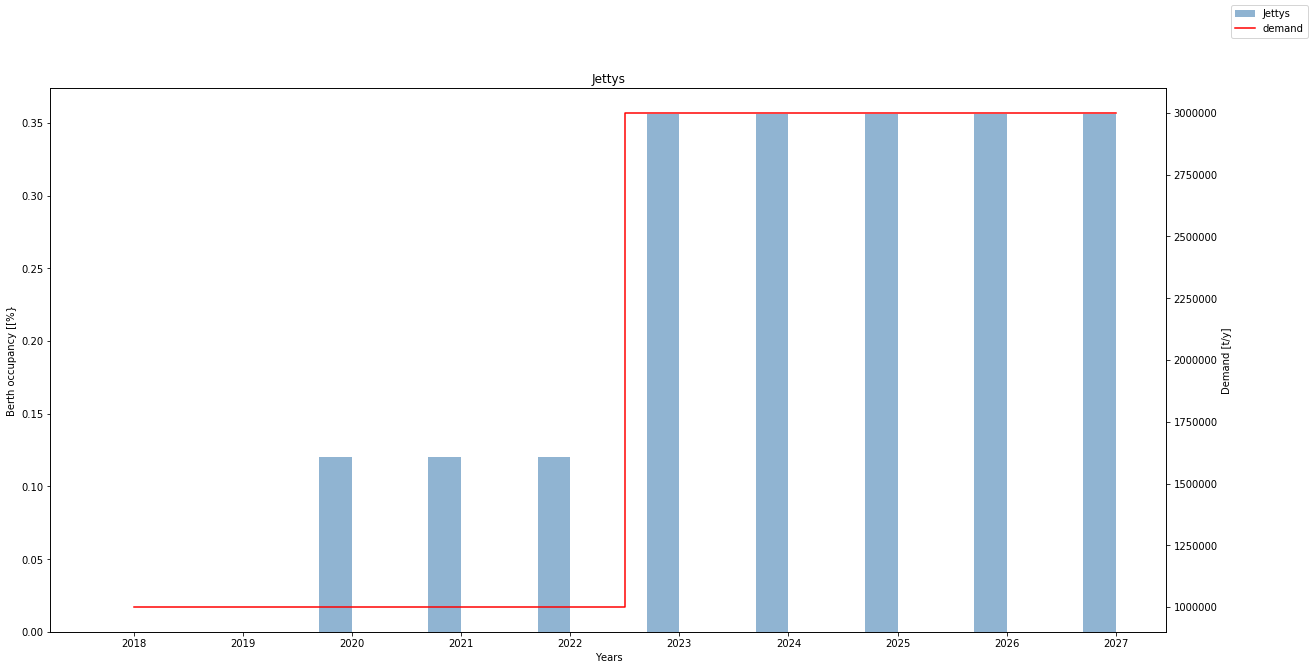

In [11]:
Terminal.terminal_occupancy_example_plot()

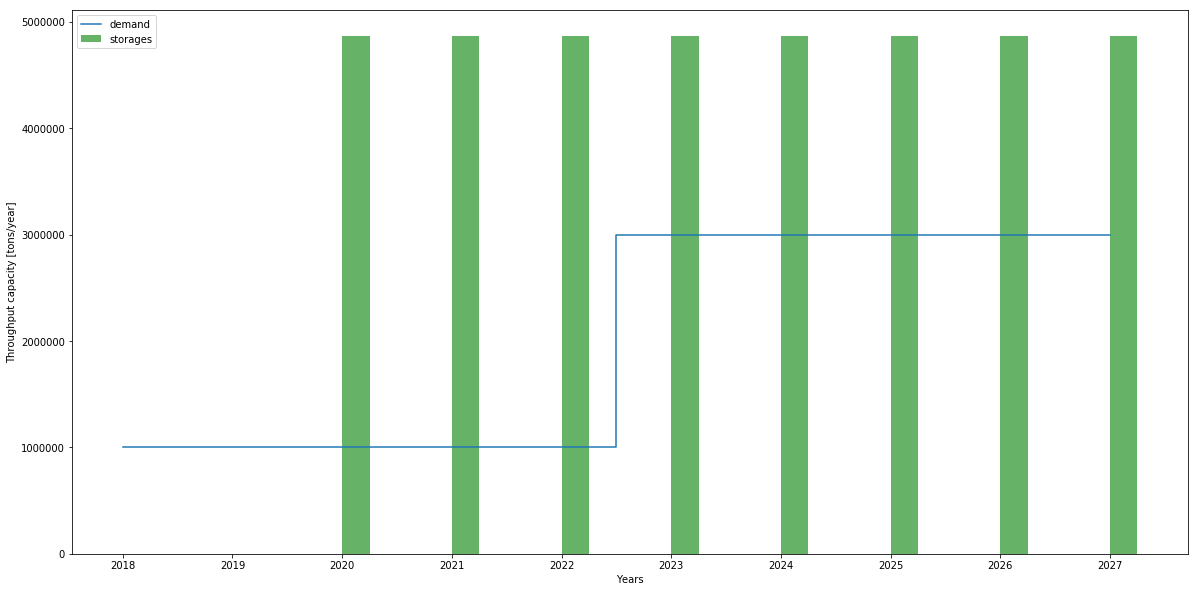

In [12]:
Terminal.terminal_capacity_plot()

In [13]:
# add cash flow information for each of the Terminal elements
cash_flows, cash_flows_WACC_real = Terminal.add_cashflow_elements()

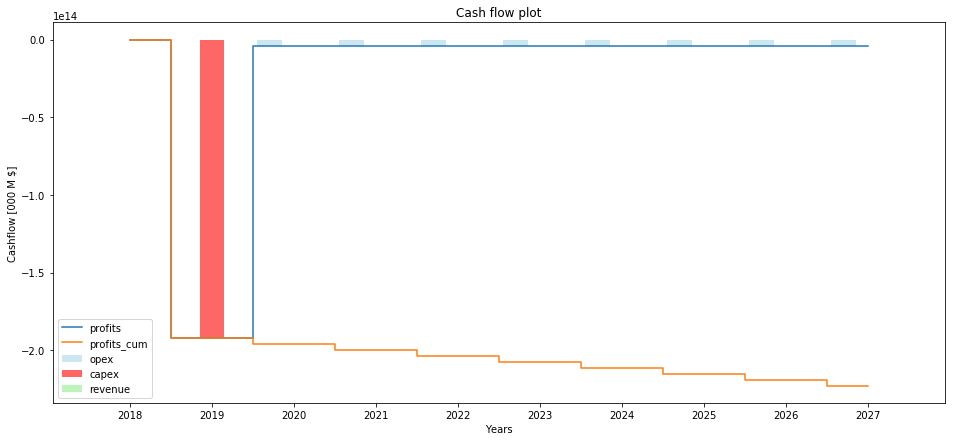

In [14]:
Terminal.cashflow_plot(cash_flows)

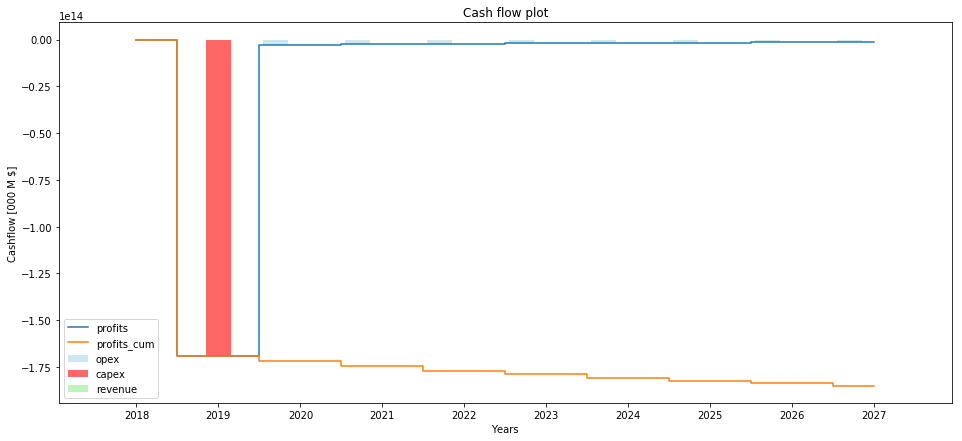

In [15]:
Terminal.cashflow_plot(cash_flows_WACC_real)

## SandBox

In [16]:
Terminal.NPV()

PV: [-1.57560000e+07 -1.69060807e+14 -2.97724931e+12 -2.62154087e+12
 -2.30833074e+12 -2.03252516e+12 -1.78968315e+12 -1.57585699e+12
 -1.38757775e+12 -1.22179319e+12]
NPV: -184975380239981.03
